<ipython-input-1-a29a03448611>:24: RuntimeWarning: invalid value encountered in true_divide
  return (-np.sin(alpha-beta)/np.sin(alpha+beta))**2
<ipython-input-1-a29a03448611>:29: RuntimeWarning: invalid value encountered in true_divide
  return (-np.tan(alpha-beta)/np.tan(alpha+beta))**2


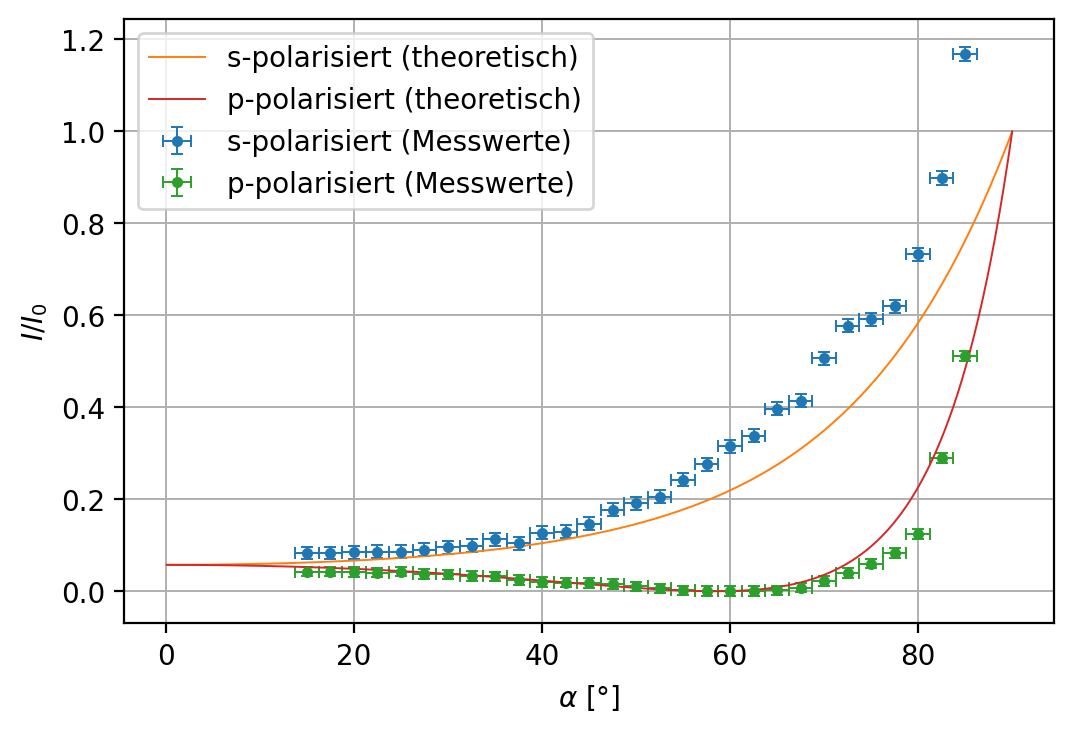

In [1]:
###Brewster Winkel 


import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt #liefert Funktionen, mit denen die Funktionsparameter berechnet werden

Is0 = 3.55 ##Nullposition senkrecht polarisiert
Ip0 = 4.83 ##Nullposition parallel polarisiert
n=1.63

data = np.loadtxt('messwerte.txt') #Die Daten sind in 'Werte.txt' gespeichert und werden daraus geladen
alpha = 90-0.5*data[:,0] #Die Werte der ersten Spalte sind die x-Werte
Is = data[:,1]/Is0 #normierte werte für Is
Ip = data[:,2]/Ip0
phierr = 2.5/2 ##grad
Ierr = 0.05 ##volt
Iserr =  np.sqrt(Ierr**2*(1/Is0**2 + Is**2/Is0**4))
Iperr =  np.sqrt(Ierr**2*(1/Ip0**2 + Ip**2/Ip0**4))
x = np.linspace(0,90,1000) ##testwinkel
def Rs(x,n):
    alpha = np.radians(x)
    beta = np.arcsin(np.sin(alpha)/n)
    return (-np.sin(alpha-beta)/np.sin(alpha+beta))**2

def Rp(x,n):
    alpha = np.radians(x)
    beta = np.arcsin(np.sin(alpha)/n)
    return (-np.tan(alpha-beta)/np.tan(alpha+beta))**2

plt.figure(dpi=200) #erstellen einer neuen Abbildung


plt.errorbar(alpha,Is, xerr=phierr, yerr=Iserr, marker='.', ls='', capsize=2, capthick=0.7, lw=0.7, label="s-polarisiert (Messwerte)") #Die Messwerte werden mit Fehler dargestellt. 
plt.plot(x,Rs(x,n),lw=0.7, label="s-polarisiert (theoretisch)")
plt.errorbar(alpha,Ip,xerr=phierr, yerr=Iperr, marker='.', ls='', capsize=2, capthick=0.7, lw=0.7, label="p-polarisiert (Messwerte)") 
plt.plot(x,Rp(x,n),lw=0.7, label="p-polarisiert (theoretisch)")
#--------------Stil-----------------------
plt.xlabel(r'$ \alpha $ [°]') #x-Beschriftung
plt.ylabel("$I/I_0$") #y-Beschriftung
plt.grid(lw=0.7) #Darstellung eines Rasters im Hintergrund
plt.legend() #Anzeige der Legende 
plt.savefig('brewster.png') #Hiermit wird der Plot in der Datei 'Plot.pdf' gespeichert
plt.show() #Vorschau des Plots

[ -1.45477832 126.80788174] [0.02788101 1.51111453]


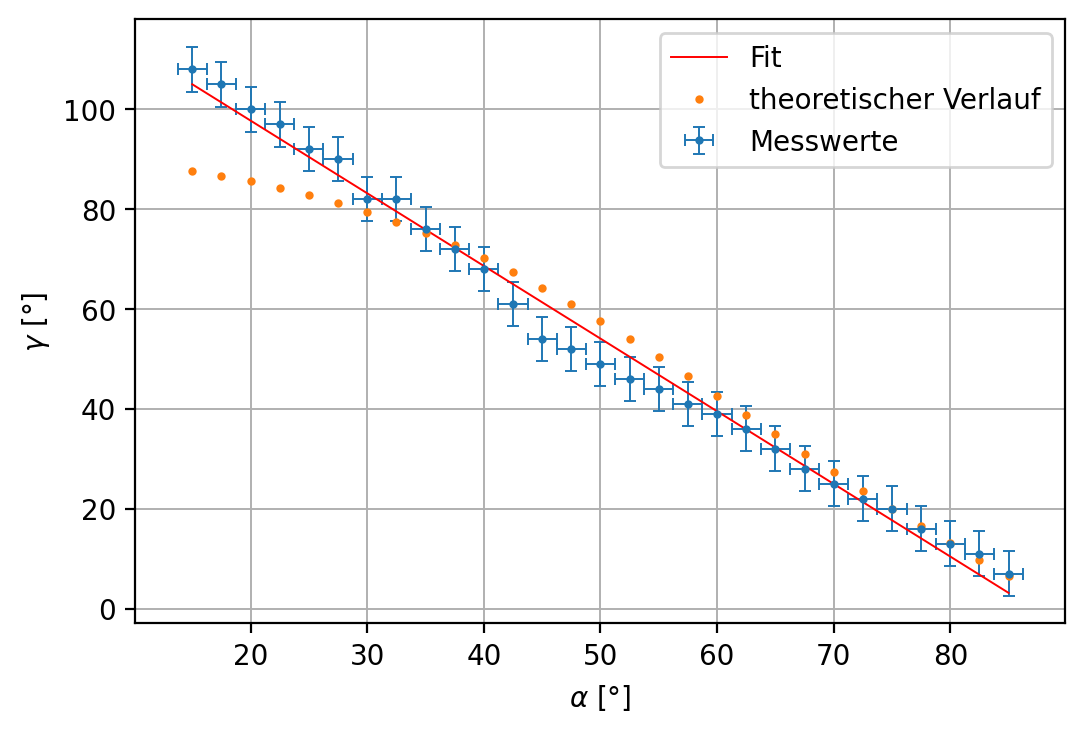

In [34]:
##Drehung der Schwingungsebene

gammar = data[:,3]
for i in range (len(P2)):
    if P2[i]<0:
        P2[i]+=180
gammae = 45
gamma = gammar-gammae
gammaerr = np.sqrt(2**2+4**2)
sigma = np.zeros(len(alpha))
for i in range(len(sigma)):
    sigma[i]=gammaerr

def f(x,m,b): #Hier wird die Funktion beschrieben deren Verlauf genähert werden soll. Dabei ist wichtig, dass x an erster Stelle steht
	return  m*x+b

p0 = [0,0]
x_test = np.linspace(np.min(alpha),np.max(alpha),1000)


fit, err = opt.curve_fit(f, alpha, gamma, p0, sigma) #Durch diese Zeile werden die Parameter des Fits berechnet. Bei der chi²-Methode wird nur der y-Fehler beachtet.
# dokumentation von curve_fit: https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html
perr = np.sqrt(np.diag(err)) #hier wird der zu den Parametern gehörige Fehler bestimmt

print(fit,perr)

##theoretische formeln
def theo(alpha,n):
    alpha=np.radians(alpha)
    a=np.arcsin(np.sin(alpha)/n)
    return np.arctan(-np.cos(alpha-a)/np.cos(alpha+a))*180/np.pi



gamma_theo=theo(alpha,1.63) - 45
for i in range(len(gamma_theo)):
    if(gamma_theo[i]<0):
        gamma_theo[i]+=180
        


plt.figure(dpi=200) #erstellen einer neuen Abbildung


plt.errorbar(alpha,gamma, xerr=phierr, yerr=gammaerr, marker='.',markersize=4, ls='', capsize=2, capthick=0.7, lw=0.7, label="Messwerte") #Die Messwerte werden mit Fehler dargestellt. 
plt.plot(x_test, f(x_test,fit[0],fit[1]), lw = 0.7,label="Fit",color = 'r') #Hiermit wird die Funktion dargestellt) 
plt.plot(alpha,gamma_theo,'.',lw = 0.7,markersize=4,label = "theoretischer Verlauf")


plt.xlabel(r'$ \alpha $ [°]') #x-Beschriftung
plt.ylabel("$\gamma$ [°]") #y-Beschriftung
plt.grid(lw=0.7) #Darstellung eines Rasters im Hintergrund
plt.legend() #Anzeige der Legende 
plt.savefig('drehung.png') #Hiermit wird der Plot in der Datei 'Plot.pdf' gespeichert
plt.show() #Vorschau des Plots
